<a href="https://colab.research.google.com/github/seanrote/neural_networks/blob/master/lstm_nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#making data
series = np.sin((0.1 * np.arange(400))**2)

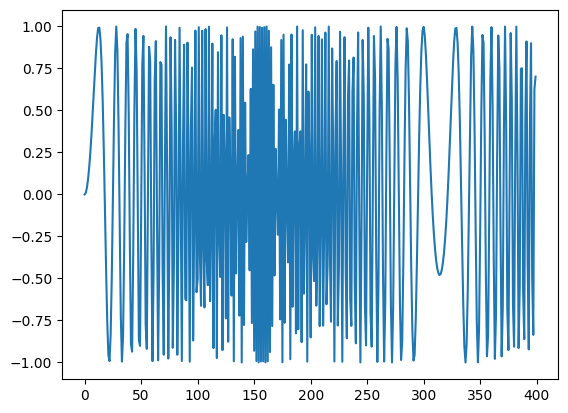

In [4]:
plt.plot(series)
plt.show()

In [5]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # N x T
Y = np.array(Y)
N = len(X)

print("X shape", X.shape, "Y shape", Y.shape)

X shape (390, 10) Y shape (390,)


In [6]:
## autoregressive model attempt
i = Input(shape=(T, ))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate= 0.01)
)

#training model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[:-N//2:])
)

Epoch 1/80
7/7 [==============================] - 1s 30ms/step - loss: 1.3138 - val_loss: 1.1786
Epoch 2/80
7/7 [==============================] - 0s 7ms/step - loss: 1.0876 - val_loss: 1.1262
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.9061 - val_loss: 1.0555
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.8010 - val_loss: 1.0097
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 0.7186 - val_loss: 0.9582
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6603 - val_loss: 0.9086
Epoch 7/80
7/7 [==============================] - 0s 8ms/step - loss: 0.6229 - val_loss: 0.8577
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5866 - val_loss: 0.8051
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5653 - val_loss: 0.7561
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5440 - val_loss: 0.7177
Epoch 11/80
7/7 [====================

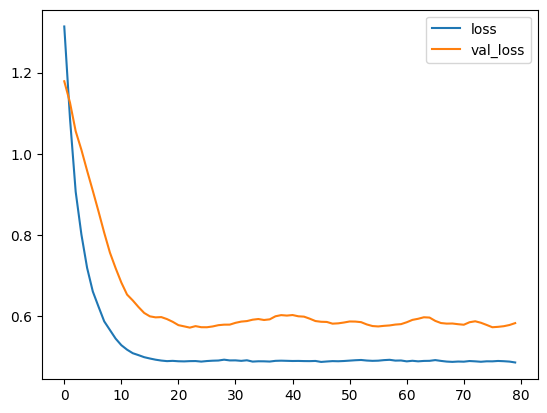

In [7]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

13/13 [==============================] - 0s 1ms/step
(390, 1)


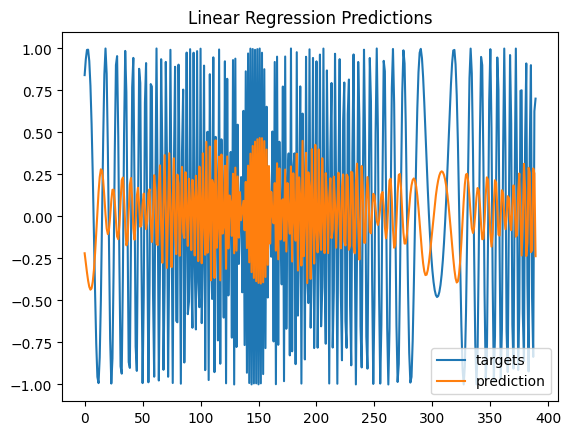

In [8]:
# one step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'prediction')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show() ## results are poor meaning we can assume multi step forecast would be worse

1/1 [==============================] - 0s 19ms/step


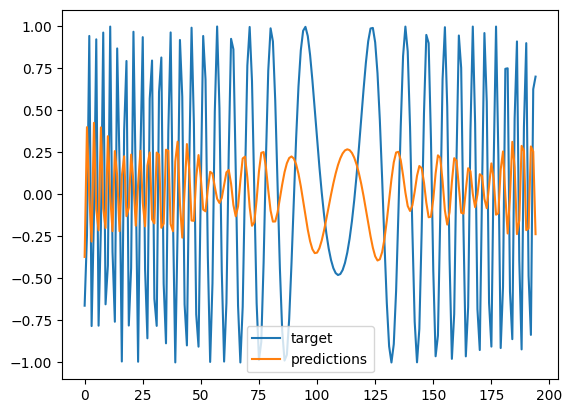

In [12]:
#one step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

#index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array --> scalar
  i += 1

  #update the prediction list
  validation_predictions.append(p)

plt.plot(validation_target, label='target')
plt.plot(validation_predictions, label='predictions')
plt.legend()

1/1 [==============================] - 0s 20ms/step


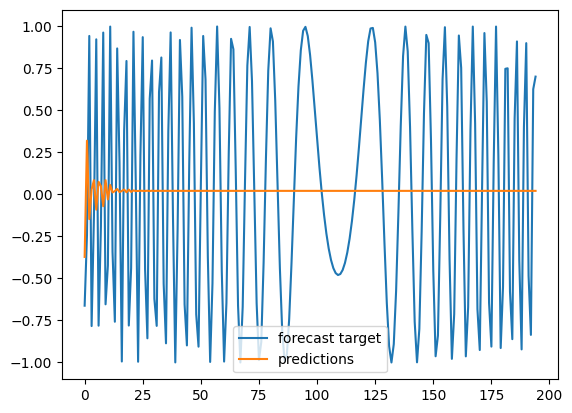

In [13]:
# trying multistep forecast
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'predictions')
plt.legend()

In [16]:
# now trying RNN/LSTM model
X = X.reshape(-1, T, 1) # N x T x D

i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer = Adam(learning_rate= 0.05),
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    epochs = 200,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 2s 64ms/step - loss: 0.6451 - val_loss: 0.6402
Epoch 2/200
7/7 [==============================] - 0s 14ms/step - loss: 0.5514 - val_loss: 0.6254
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5481 - val_loss: 0.6498
Epoch 4/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5373 - val_loss: 0.6506
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 0.4928 - val_loss: 0.6326
Epoch 6/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4334 - val_loss: 0.5852
Epoch 7/200
7/7 [==============================] - 0s 15ms/step - loss: 0.4095 - val_loss: 0.6270
Epoch 8/200
7/7 [==============================] - 0s 16ms/step - loss: 0.4580 - val_loss: 0.5468
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 0.3907 - val_loss: 0.5552
Epoch 10/200
7/7 [==============================] - 0s 16ms/step - loss: 0.3693 - val_loss: 0.4674
Epoch 11/200
7/7 [=

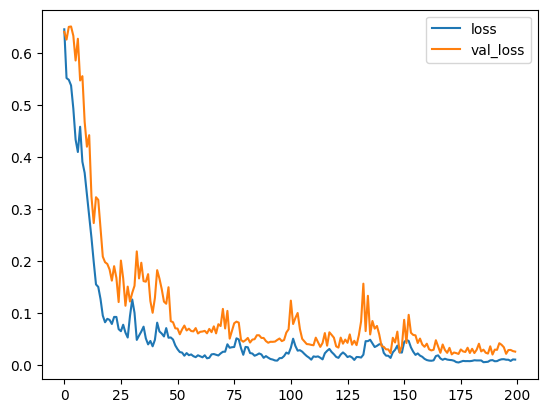

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 3ms/step
(390, 1)


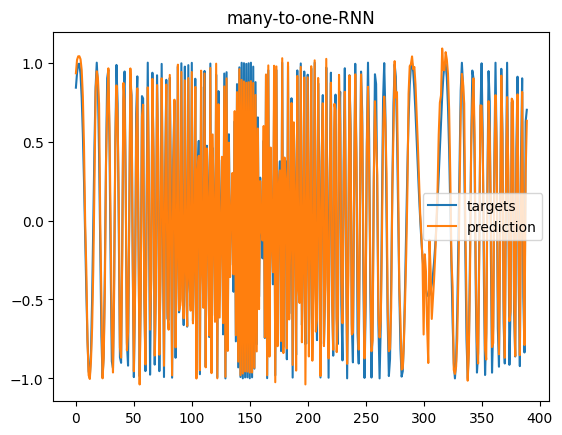

In [18]:
#one step forecsat
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'prediction')
plt.title("many-to-one-RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


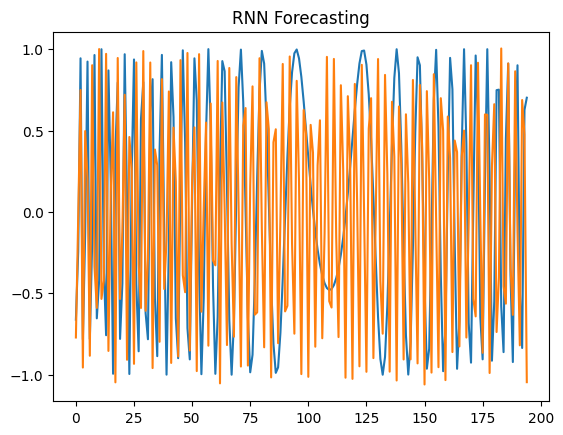

In [19]:
#multi step forecast
forecast = []
input_ = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N // 2:], label= "targets")
plt.plot(forecast, label='forecast')
plt.title("RNN Forecasting")
plt.show()

In [20]:
#trying LSTM
X = X.reshape(-1, T, 1) # N x T x D

i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer = Adam(learning_rate= 0.05),
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size = 32,
    epochs = 200,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 3s 78ms/step - loss: 0.5145 - val_loss: 0.5615
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5210 - val_loss: 0.5543
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4712 - val_loss: 0.4432
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4581 - val_loss: 0.5642
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4311 - val_loss: 0.3745
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3112 - val_loss: 0.3511
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2513 - val_loss: 0.2955
Epoch 8/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2063 - val_loss: 0.3052
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1366 - val_loss: 0.1980
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0857 - val_loss: 0.2533
Epoch 11/200
7/7 [=

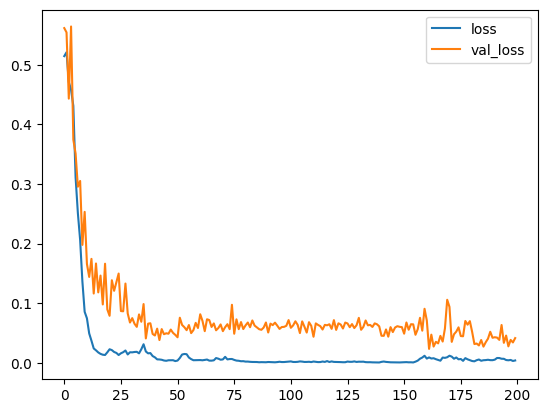

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step
(390, 1)


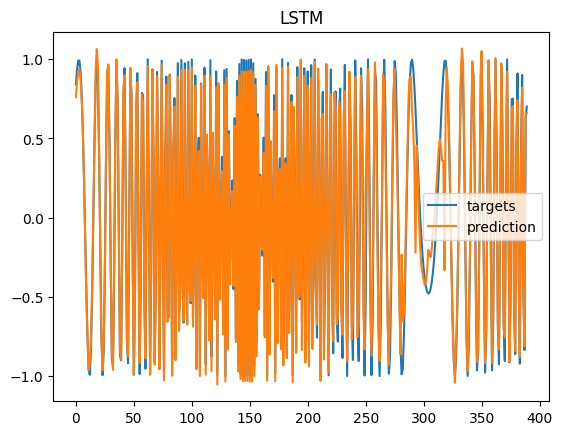

In [24]:
#one step forecsat
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'prediction')
plt.title("LSTM")
plt.legend()
plt.show() ## results are poor meaning we can assume multi step forecast would be worse

1/1 [==============================] - 0s 21ms/step


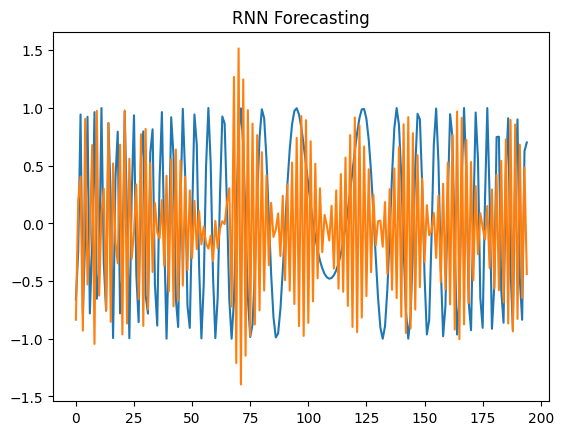

In [23]:
#multi step forecast
forecast = []
input_ = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N // 2:], label= "targets")
plt.plot(forecast, label='forecast')
plt.title("LSTM Forecasting")
plt.show()